In [87]:
import tensorflow as tf
from tensorflow import keras 

In [88]:
import matplotlib.pyplot as plt
import numpy as np

In [89]:
print (tf.__version__)

2.15.0


In [90]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [91]:
train_images.shape

(60000, 28, 28)

In [92]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [93]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

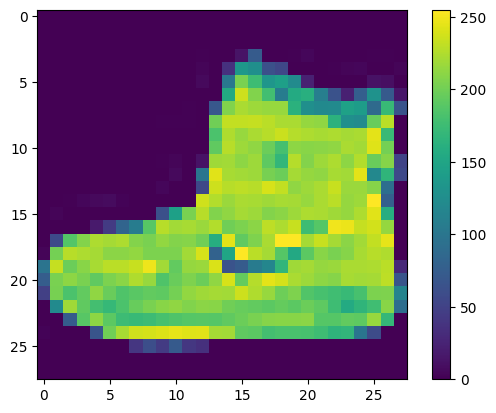

In [94]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

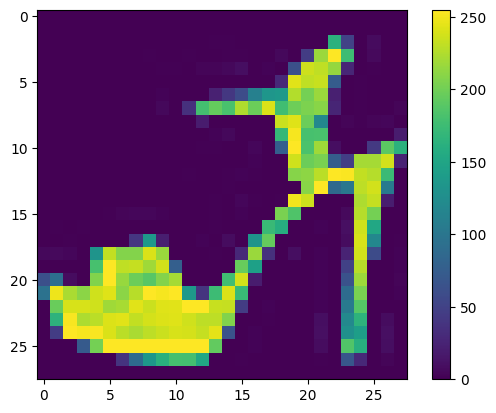

In [95]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.show

In [96]:
#######################preprocess the dataset ###########################3

In [97]:
train_images = train_images/225
test_images = test_images/225

In [98]:
class_names = [
    'T-shirt/top',
	'Trouser',
	'Pullover',
	'Dress',
	'Coat',
	'Sandal',
	'Shirt',
	'Sneaker',
	'Bag',
	'Ankle boot']

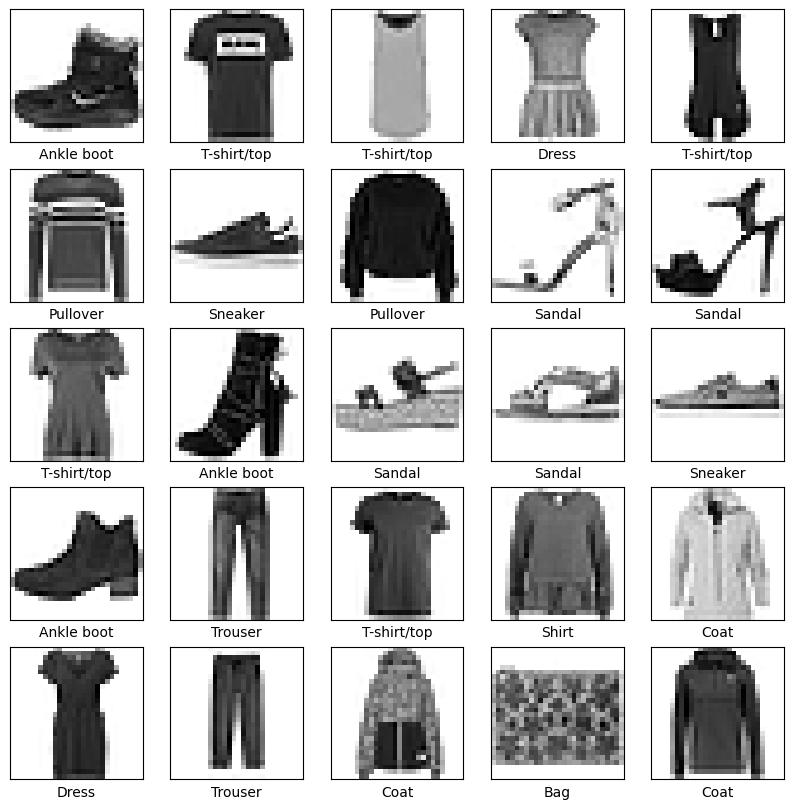

In [99]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # cmap=plt.cm.binary to show img in black and white
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [100]:
################# SET UP THE LAYERS ########################

In [101]:
# Input Layer Flatten the two dimensional array(28x28) into 1d array (28x28=784)
# Hidden Layer Dense fully connected Layer of 28 nodes (relu)
# Output Layer Dense fully connected layer of 10 nodes (softmax)

In [102]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [103]:
#To do this we need to understand three things:
#1. Loss function measures how accurate the output is
#2. Optimizer measures how the model is updated
#3. Metrics monitors the trainig to determine when to stop

In [104]:
# compile the model 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [105]:
############## training the model #################
# we are going o train the models in 10 epochs (that is a complete presentation of the training dataset) 
# #This means that we would feed the 60,000 images and Labes into the network 10 different time
#For each epoch we would see both the los and the accuracy of the model

In [106]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4950 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3723 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3340 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3120 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2934 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2799 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2690 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2567 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2472 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [107]:
test_images.shape

(10000, 28, 28)

In [108]:
################# make prediction ##########

In [109]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3511 - accuracy: 0.8799


In [110]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [111]:
test_images.shape

(10000, 28, 28)

In [112]:
predictions.shape

(10000, 10)

In [113]:
# predictions is an array of 10 numbers. Each elements represents the confidance that the  image corresponts to each of the 
# 10 different classes 
predictions[0]

array([3.4153227e-06, 1.8423486e-09, 1.3136293e-09, 2.0489482e-08,
       1.2118333e-08, 4.7976095e-03, 1.1611986e-06, 1.4691147e-02,
       8.0560824e-08, 9.8050654e-01], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

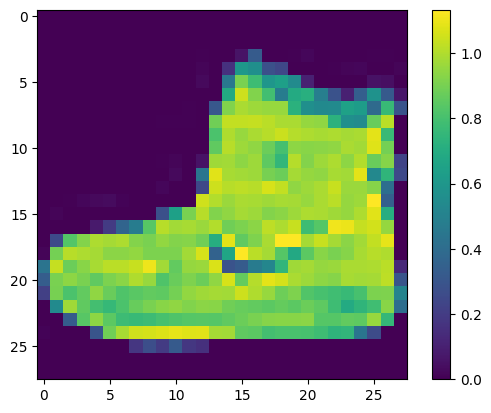

In [114]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show

In [115]:
########### evalute the prediction result #############  

In [149]:
import numpy as np 
import matplotlib.pyplot as plt  

def plot_image(i, predictions_array, true_label, img, class_names):  
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]  

    plt.grid(False)  
    plt.xticks([])  
    plt.yticks([])  
    plt.imshow(img, cmap=plt.cm.binary)  

    predicted_label = np.argmax(predictions_array)  

    color = 'green' if predicted_label == true_label else 'red'  

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100 * np.max(predictions_array), class_names[true_label]), color=color) 
 

def plot_value_array(i, predictions_array, true_label):  
    predictions_array, true_label = predictions_array, true_label[i]  

    plt.grid(False)  
    plt.xticks(range(10))  
    plt.yticks([])  

    thisplot = plt.bar(range(10), predictions_array, color="#777777")  
    plt.ylim([0, 1])  

    predicted_label = np.argmax(predictions_array)  

    thisplot[predicted_label].set_color("red")  
    thisplot[true_label].set_color('blue')   


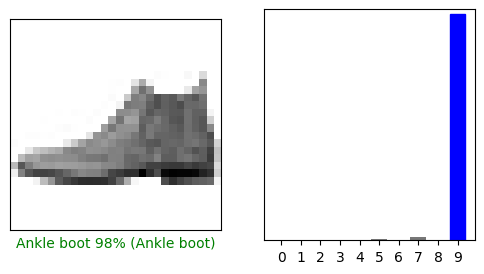

In [117]:
class_names = [  
    'T-shirt/top',  
    'Trouser',  
    'Pullover',  
    'Dress',  
    'Coat',  
    'Sandal',  
    'Shirt',  
    'Sneaker',  
    'Bag',  
    'Ankle boot'  
]  

i = 0  
plt.figure(figsize=(6, 3))  
plt.subplot(1, 2, 1)  
# Ensure class_names is passed to the function  
plot_image(i, predictions[i], test_labels, test_images, class_names)  # Added class_names  
plt.subplot(1, 2, 2)  
plot_value_array(i, predictions[i], test_labels)  
plt.show()

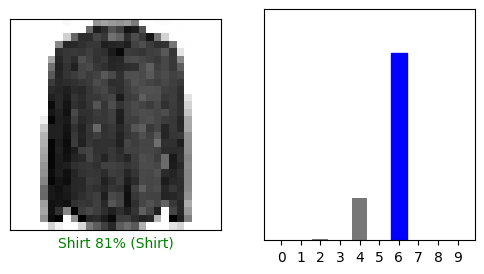

In [123]:


i = 44 
plt.figure(figsize=(6, 3))  
plt.subplot(1, 2, 1)  
# Ensure class_names is passed to the function  
plot_image(i, predictions[i], test_labels, test_images, class_names)  # Added class_names  
plt.subplot(1, 2, 2)  
plot_value_array(i, predictions[i], test_labels)  
plt.show()

In [119]:
########### evalute the prediction result (2) #############  

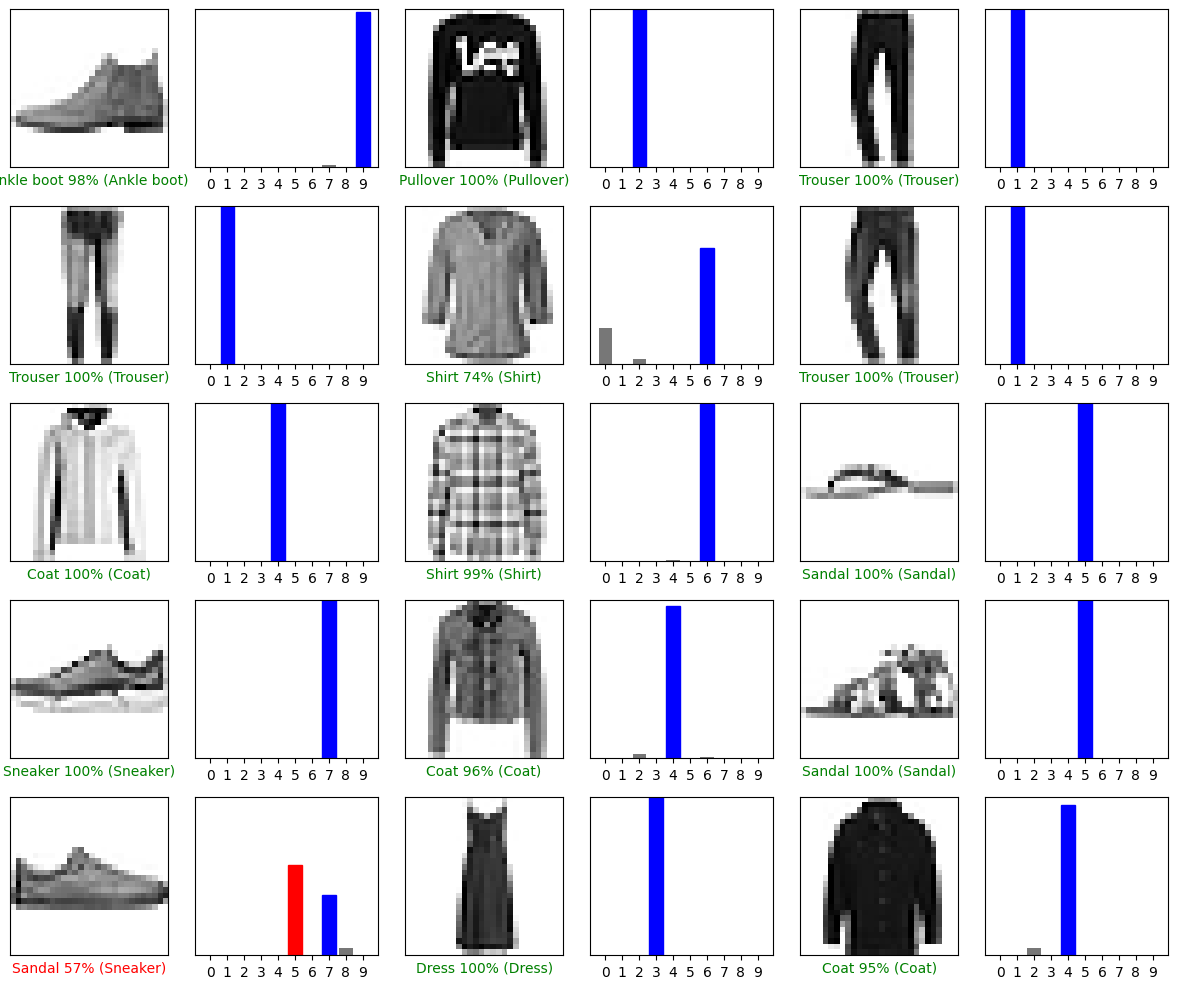

In [124]:
 
rows = 5  
cols = 3  
num_images = rows * cols  

plt.figure(figsize=(2*2*cols, 2*rows))  

for i in range(num_images):  
    plt.subplot(rows, 2*cols, 2*i+1)  
    plot_image(i, predictions[i], test_labels, test_images, class_names)  
    # plot_image(i, predictions[i], test_labels, test_images, class_names)  # Added class_names  
    plt.subplot(rows, 2*cols, 2*i+2)  
    plot_value_array(i, predictions[i], test_labels)  

plt.tight_layout()  
plt.show()  



In [125]:
################## prediction on a single image #################

In [130]:
img = test_images[8]
img.shape

(28, 28)

In [132]:
img = (np.expand_dims(img,0))
img.shape

(1, 1, 28, 28)

In [134]:
my_prediction = model.predict(img)  
my_prediction

1/1 [==============================] - 0s 148ms/step


array([[5.25243195e-06, 3.38039257e-07, 2.97334765e-07, 1.03764295e-08,
        3.96694617e-07, 9.99899745e-01, 1.20954340e-07, 7.72402564e-05,
        1.66332993e-05, 1.61218527e-09]], dtype=float32)

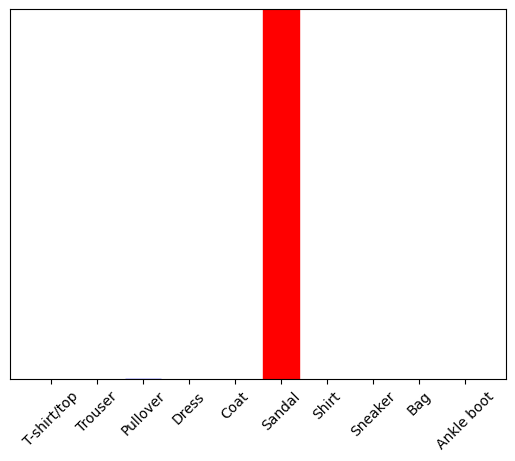

In [142]:
plot_value_array(1,my_prediction[0],test_labels)
img = plt.xticks(range(10),class_names, rotation=45)

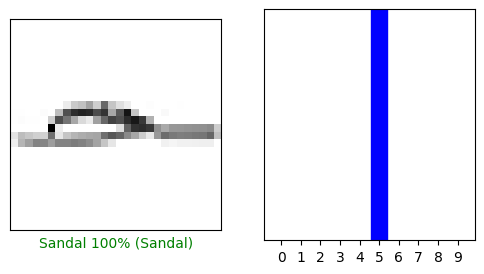

In [150]:
i = 8 
plt.figure(figsize=(6, 3))  
plt.subplot(1, 2, 1)  
# Ensure class_names is passed to the function  
plot_image(i, predictions[i], test_labels, test_images, class_names)  # Added class_names  
plt.subplot(1, 2, 2)  
plot_value_array(i, predictions[i], test_labels)  
plt.show()